In [40]:
# add the base SmartEM path to the python path
import sys

sys.path.append("..")

from src import smartem, tools
from src.online import microscope, get_rescan_maps

<module 'src.online.get_rescan_maps' from '/n/home12/cfpark00/SmartEM/examples/../src/online/get_rescan_maps.py'>

In [41]:
microscope_type = "fake_data"

In [42]:
if microscope_type == "verios":
    params = {"ip": "192.168.0.1"}
    my_microscope = microscope.ThermoFisherVerios(params=params)
elif microscope_type == "fake":
    params = {"W": 1024, "H": 1024, "dtype": np.uint16}
    my_microscope = microscope.FakeRandomMicroscope(params=params)
elif microscope_type == "fake_data":
    params = {
        "images_ns": {
            50: "../examples/data/example1/loc_001_dwell_00050ns_00002_param_001_yi_1_xi_1_reg.png",
            100: "../examples/data/example1/loc_001_dwell_00100ns_00004_param_001_yi_1_xi_1_reg.png",
            200: "../examples/data/example1/loc_001_dwell_00200ns_00007_param_001_yi_1_xi_1_reg.png",
            500: "../examples/data/example1/loc_001_dwell_00500ns_00010_param_001_yi_1_xi_1_reg.png",
            1200: "../examples/data/example1/loc_001_dwell_01200ns_00014_param_001_yi_1_xi_1_reg.png",
        }
    }
    my_microscope = microscope.FakeDataMicroscope(params=params)
else:
    raise ValueError("Unknown microscope type")

In [54]:
get_rescan_map_type = "membrane_errors"

In [55]:
if get_rescan_map_type == "test":
    params = {"type": "half", "fraction": 0.5}
    get_rescan_map = get_rescan_maps.GetRescanMapTest(params=params)
elif get_rescan_map_type == "membrane_errors":
    params = {
        "em2mb_net": "../pretrained_models/em2mb_best.pth",
        "error_net": "../pretrained_models/error_best.pth",
        "device": "auto",
        "pad": 0,
        "rescan_p_thres": 0.1,
        "rescan_ratio": None,  # add a number to force a specific rescan ratio
        "search_step": 0.01,
        # "do_clahe": False,
    }

    get_rescan_map = get_rescan_maps.GetRescanMapMembraneErrors(params=params)
else:
    raise ValueError("Unknown get_rescan_map method")

In [56]:
my_smart_em = smartem.SmartEM(microscope=my_microscope, get_rescan_map=get_rescan_map)

my_smart_em.initialize()
print(my_smart_em)

SmartEM with microscope:
and get_rescan_map:


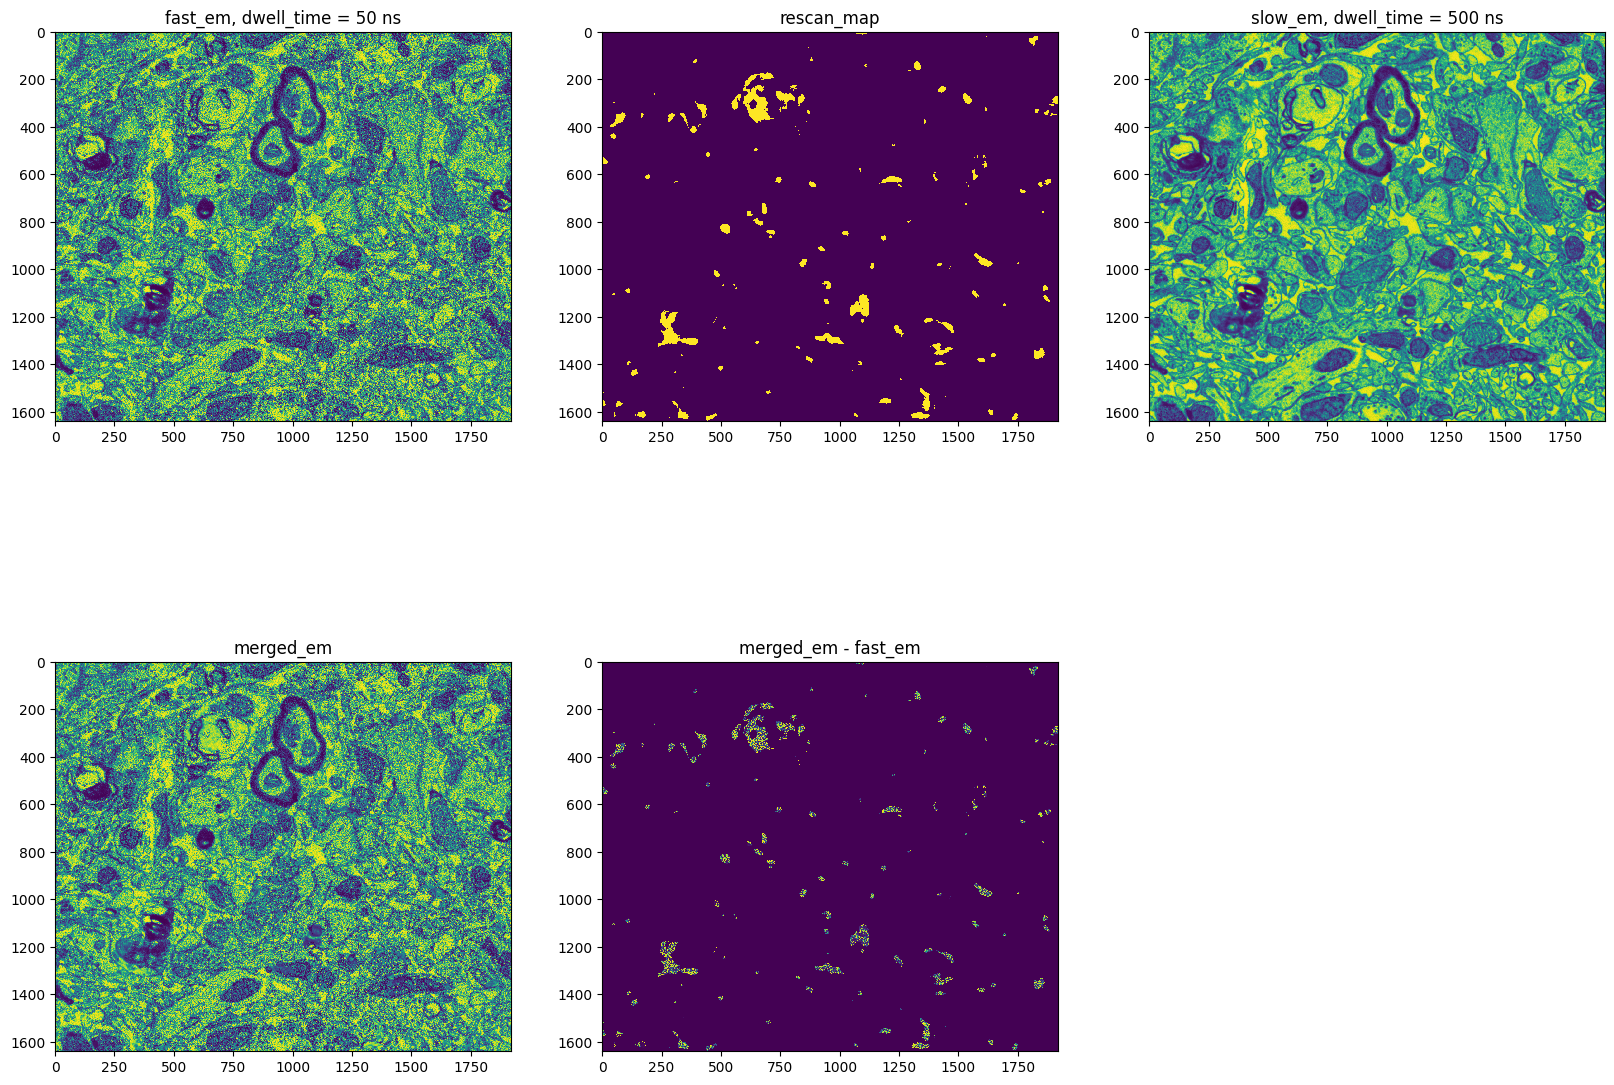

In [57]:
params = {"fast_dwt": 50e-9, "slow_dwt": 500e-9, "plot": True}
fast_em, slow_em, rescan_map = my_smart_em.acquire(params=params)

In [58]:
my_smart_em.close()